In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

# Task I - Density‐based Clustering

In [2]:
def _dist(p:pd.Series,q:pd.Series):
    return np.sqrt(np.sum(np.square(p-q)))

In [3]:
def _eps_neighborhood(p:pd.Series,q:pd.Series,eps):
    if _dist(p,q)<eps:
        return True
    else:
        return False

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    
    for i in range(n_points):
        var1=pd.Series([m[0,point_id],m[1,point_id]])
        var2=pd.Series([m[0,i],m[1,i]])
        
        if _eps_neighborhood(var1,var2,eps)==True:
            seeds.append(i)
            
    return seeds

In [5]:
def _expand_cluster(m, classifications, NeighborPts, cluster_id, eps, min_points,if_visted):
    i=0
    while True:
    
        classifications[NeighborPts[i]]=cluster_id    #屬於該cluster的點先給予cluster_id

        if if_visted[NeighborPts[i]]==0:              #確認NeighborPts中的每一點是否找過 若否 則確認是否為另一中心點 是的話再將找到的點加入NeighborPts
            
            NeighborPts_tem=_region_query(m, NeighborPts[i], eps)
            if len(NeighborPts_tem)>=min_points:
                NeighborPts.extend(NeighborPts_tem)
                
            if_visted[NeighborPts[i]]=1               #該點狀態為已找過
        
        if i==len(NeighborPts)-1:                     #若目前的點已為NeighborPts中的最後一點則結束迴圈
            break
        else:
            i+=1

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    if_visted=[0]*n_points                        #記錄該點是否找過
    tem_ran=0
    
    while True:
        
        while True:
            tem_ran=random.randint(0,n_points-1)  #找到一個並未被分群的隨機起始值
            if classifications[tem_ran]==False:
                break
        
        if_visted[tem_ran]=1                      #該點狀態為已找過
        
        NeighborPts = _region_query(m, tem_ran, eps)    #找出該點的鄰近點
        
        if len(NeighborPts)<min_points:
            classifications[tem_ran]=NOISE
        else:
            classifications[tem_ran]=cluster_id      #若該點確認為中心點 則給予cluster_id
            _expand_cluster(m, classifications, NeighborPts, cluster_id, eps, min_points,if_visted)   #並找出所有屬於該cluster的點
            
            
        cluster_id+=1    #此cluster已找完 換尋找下一cluster

        check_num=0
        for i in range(n_points):
            if classifications[i]==UNCLASSIFIED:     #若每一點皆已確認狀態 則迴圈結束
                check_num+=1
        if check_num==0:
            return classifications
            break


In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

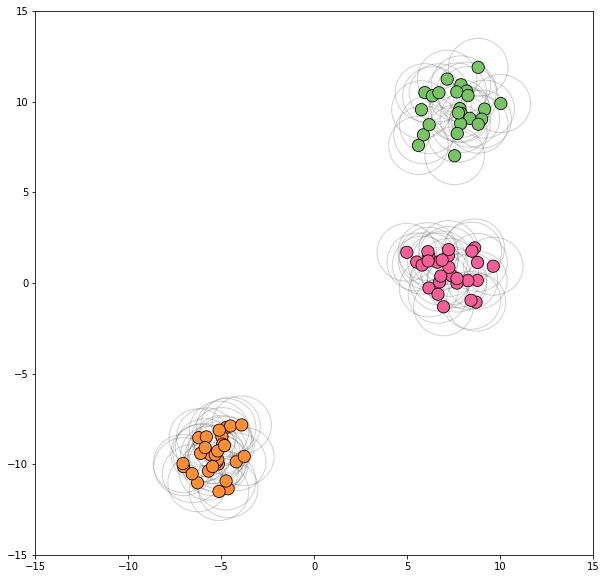

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

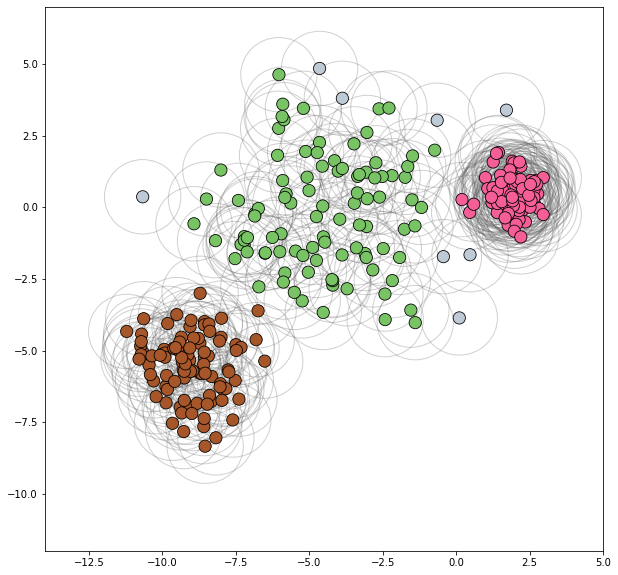

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_X_Y_raw=np.vstack((scat_X, scat_Y))

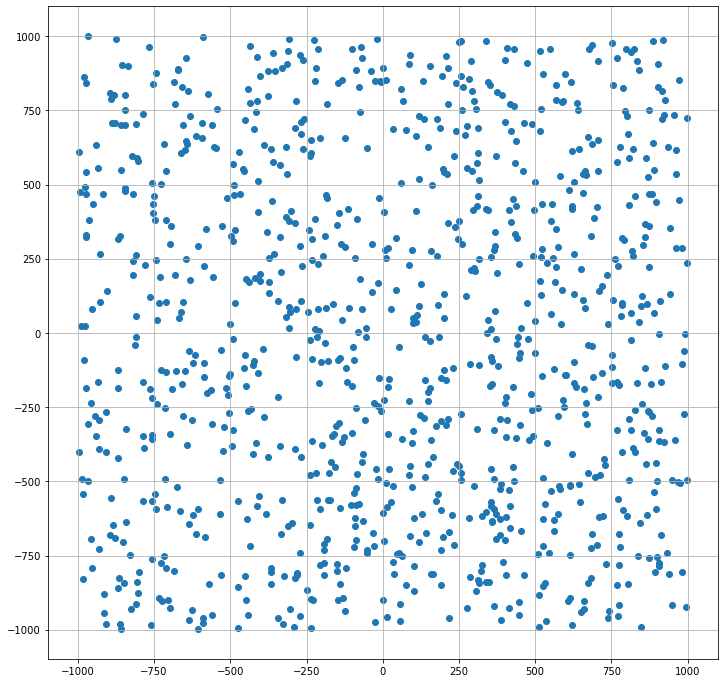

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
plt.scatter(scat_X_Y_raw[0],scat_X_Y_raw[1])

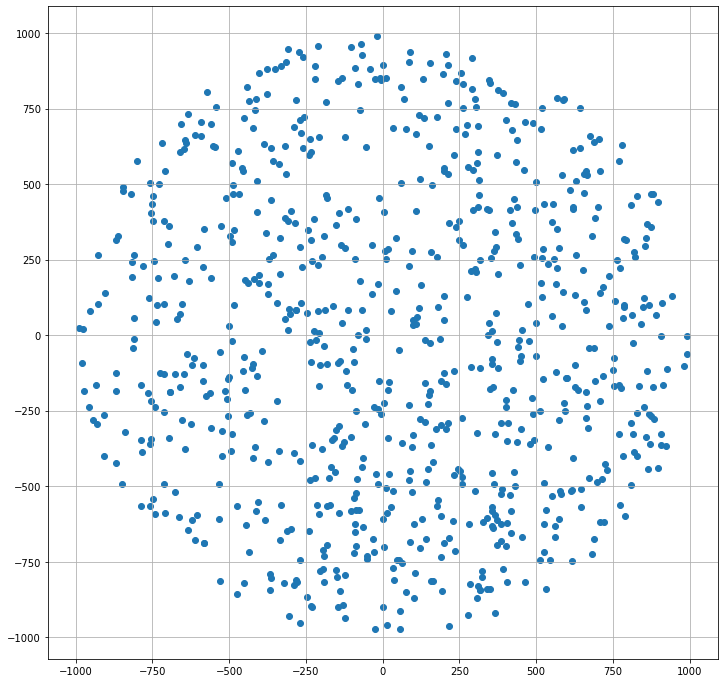

In [15]:
result=map(lambda x,y:np.sqrt(x**2+y**2),scat_X_Y_raw[0],scat_X_Y_raw[1])  #算出每點與原點之距離

def d(a:list):
    return [a.index(n) for n in a if n <=1000]      #回傳距離小於1000的點
    
c=d(list(result))

%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
plt.scatter(scat_X_Y_raw[0,c],scat_X_Y_raw[1,c])

In [16]:
dist_thou=[[]*i for i in range(2)]
for i in range(2):
    dist_thou[i]=list(scat_X_Y_raw[i,c])

In [17]:
dist=[[]*i for i in range(len(c))]

for i in range(len(c)):     #算出小於1000的點中 各點之間的距離
    
    dist[i].extend(list(map(lambda x,y:np.sqrt((x-dist_thou[0][i])**2+(y-dist_thou[1][i])**2),dist_thou[0],dist_thou[1])))

In [18]:
dist_sq=np.array(dist)

In [19]:
nearest=np.argsort(dist_sq)  #按距離長短排序

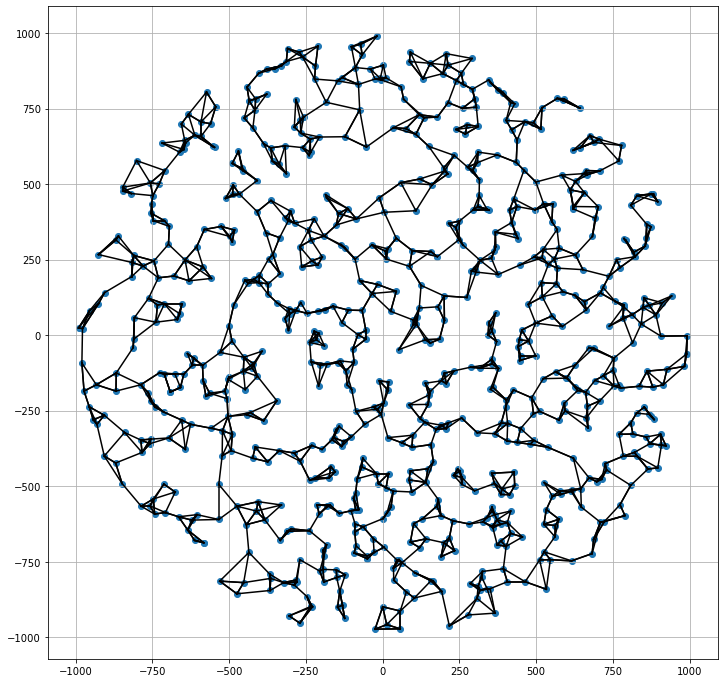

In [20]:
plt.figure(figsize = (12, 12))
plt.grid()
plt.scatter(dist_thou[0],dist_thou[1])
# Put the "X" and "Y" in the scatter plot function...

# draw lines from each point to its three nearest neighbors
for i in range(len(dist_thou[0])):
    for j in range(1,4):
        a=[dist_thou[0][i],dist_thou[0][nearest[i,j]]]
        b=[dist_thou[1][i],dist_thou[1][nearest[i,j]]]
        plt.plot(a,b,color='k')